# MLP with MNIST

MNIST dataset을 분류하는 Multi-layer Perceptron을 Keras를 이용하여 작성해보도록 하겠습니다.

In [0]:
import keras
keras.__version__

'2.2.4'

Mnist data load

In [0]:
from keras.datasets import mnist

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [0]:
train_images.shape

(60000, 28, 28)

Plot images (import matplotlib)

In [0]:
import matplotlib.pyplot as plt

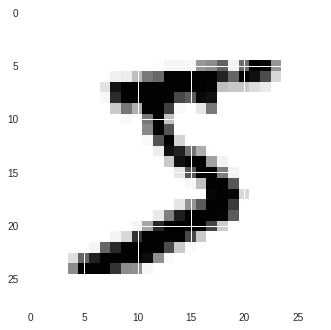

In [0]:
digit = train_images[0]
plt.imshow(digit)
plt.show()

## Construct MLP model

simple MLP structure (784-512-10)

In [0]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu',input_dim = 28*28))
network.add(layers.Dense(10,activation='softmax'))

Construct loss function

In [0]:
network.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

## Data Preprocessing
1. input Data
  - Normalization: 0~255 -> 0~1
  - reshape: (28,28) -> 784
2. Categorical labels
  - one hot encoding


In [0]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [33]:
print(train_labels.shape)

(60000, 10)


## Train models

In [36]:
network.fit(train_images, train_labels, epochs=5, batch_size = 128)

Epoch 1/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.2565 - acc: 0.9259
Epoch 2/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.1039 - acc: 0.9691
Epoch 3/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0690 - acc: 0.9797
Epoch 4/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.0500 - acc: 0.9844
Epoch 5/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0377 - acc: 0.9889


In [37]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 49us/step


In [38]:
print('test_acc', test_acc)

test_acc 0.9806


# Fashion MNIST

같은 네트워크로 MNIST 보다 약간 어려운 데이터 셋인 Fashion-mnist set에 대한 분류 문제 해결

In [0]:
from keras.datasets import fashion_mnist

In [16]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


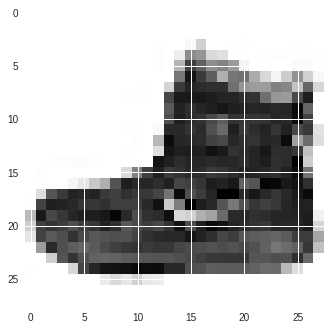

In [17]:
plt.imshow(x_train[0])
plt.show()

## Performance

1. Training performance
2. Test performance